### ID2214/FID3214 Assignment 3 Group no. 12

Project members:

Aksel Uhr, auhr@kth.se 
Olivia Höft, hoft@kth.se 
Ilias Merentitis, iliasme@kth.se

Declaration

By submitting this solution, it is hereby declared that all individuals listed above have contributed to the solution, either with code that appear in the final solution below, or with code that has been evaluated and compared to the final solution, but for some reason has been excluded. It is also declared that all project members fully understand all parts of the final solution and can explain it upon request.

It is furthermore declared that the code below is a contribution by the project members only, and specifically that no part of the solution has been copied from any other source (except for lecture slides at the course ID2214/FID3214) and no part of the solution has been provided by someone not listed as project member above.
It is furthermore declared that it has been understood that no other library/package than the Python 3 standard library, NumPy, pandas, time and sklearn.tree, may be used in the solution for this assignment.

In [396]:
import numpy as np
import pandas as pd
import time
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import math
from rdkit import Chem
import rdkit.Chem.rdMolDescriptors as d
import rdkit.Chem.Descriptors as d2
import rdkit.Chem.Fragments as f
import rdkit.Chem.Lipinski as l
from rdkit.Chem import AllChem

In [382]:
def feature_selection():
    train_df = pd.read_csv("training_smiles.csv")
    test_df = pd.read_csv("test_smiles.csv")
    
    sample = train_df.sample(n = int(len(train_df)*0.99))
    train_df = train_df.drop(sample.index)
    dfCopy = train_df.copy()

    dfCopy["NUM_OF_ATOMS"] = dfCopy.apply(lambda x: (Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms()), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)
    dfCopy["DENSITY"] = dfCopy.apply(lambda x: (d2.FpDensityMorgan1(Chem.MolFromSmiles(x["SMILES"]))), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)   
    dfCopy["MAX_PCHARGE"] = dfCopy.apply(lambda x: (d2.MaxPartialCharge(Chem.MolFromSmiles(x["SMILES"]))), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)
    dfCopy["MIN_PCHARGE"] = dfCopy.apply(lambda x: (d2.MinPartialCharge(Chem.MolFromSmiles(x["SMILES"]))), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)



    # doesn't work
    #dfCopy["MORSE"] = dfCopy.apply(lambda x: (d.CalcMORSE(Chem.MolFromSmiles(x["SMILES"]))), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)
    #dfCopy["RAD_ELECTRONS"] = dfCopy.apply(lambda x: (d2.NumRadicalElectrons(Chem.MolFromSmiles(x["SMILES"]))), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)
    # dfCopy["NRP"] = dfCopy.apply(lambda x: (d.CalcNPR1(Chem.MolFromSmiles(x["SMILES"]))), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)



    # Dont use bcs of high correlation
    # dfCopy["VAL_ELECTRONS"] = dfCopy.apply(lambda x: (d2.NumValenceElectrons(Chem.MolFromSmiles(x["SMILES"]))), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)
    # dfCopy["MOL_WEIGHT"] = dfCopy.apply(lambda x: (d.CalcExactMolWt(Chem.MolFromSmiles(x["SMILES"]))), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)



    
  #  MaxPartialCharge



    return dfCopy


In [383]:
feature_selection()

,INDEX,SMILES,ACTIVE,NUM_OF_ATOMS,MOL_WEIGHT,DENSITY,VAL_ELECTRONS,MAX_PCHARGE,MIN_PCHARGE
16,17,COc1cccc(C2=CC(c3ccc(OC)c(OC)c3OC)N3NN=NC3=N2)c1,0.0,29,395.159354,0.931034,150,0.268083,-0.496744
57,58,COc1ccc(O[C@H]2C=C[C@@H](c3ccccc3)O[C@@H]2COC(...,0.0,47,638.299202,0.936170,246,0.305762,-0.496764
95,96,O=[N+]([O-])c1ccc(S(=O)(=O)Cc2ccccc2)c2nonc12,0.0,22,319.026291,1.045455,112,0.300341,-0.258238
272,273,O=C(CNC1CCCCC1)N1CCC2(CC1)OCCO2,0.0,20,282.194343,1.100000,114,0.236040,-0.347391
389,390,Cc1cc(C(=O)N/N=C2\CCCc3ccccc32)c(C)o1,0.0,21,282.136828,1.238095,108,0.274421,-0.465825
...,...,...,...,...,...,...,...,...,...
148132,148133,C[C@H](NC(=O)c1ccco1)C(=O)Nc1ccc2c(c1)OCO2,0.0,22,302.090272,1.181818,114,0.287115,-0.459205
148225,148226,CC(C)NC1(C(N)=O)CCN(Cc2ccccc2)CC1,0.0,20,275.199762,1.300000,110,0.237337,-0.368067
148271,148272,Oc1cccc(O)c1,0.0,8,110.036779,1.000000,42,0.118764,-0.507823
148417,148418,CC(C)N1CC(C(=O)Nc2ccc(Br)c(Cl)c2)CC1=O,0.0,20,358.008368,1.500000,108,0.229300,-0.339438


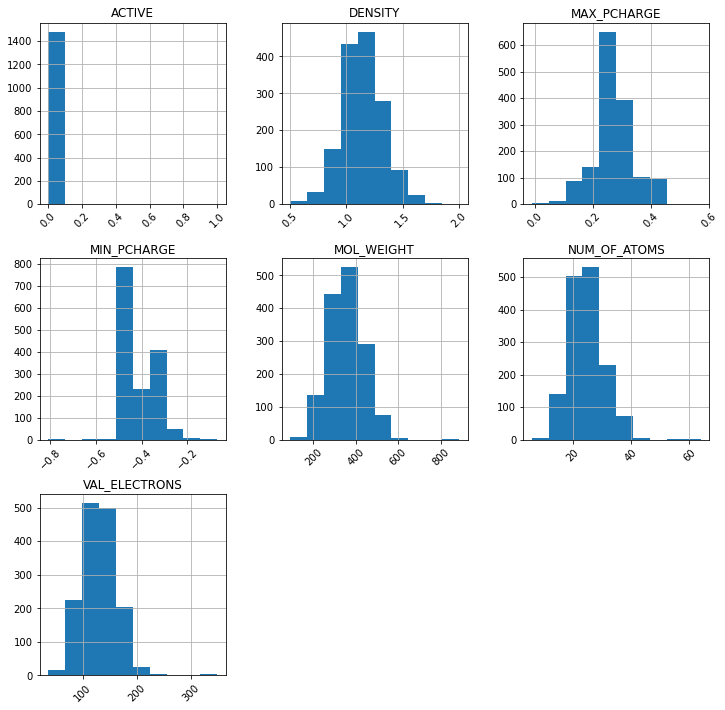

In [393]:
#Plot Histograms of selected features
df = feature_selection()
dfPlotCopy = df.copy()
dfPlotCopy = dfPlotCopy.iloc[:, 2:]
dfPlotCopy.hist(figsize=(12,12), xrot=45)
plt.show()


In [394]:
# Correlation between features
corrs = dfPlotCopy.corr()
display(corrs)

,ACTIVE,NUM_OF_ATOMS,MOL_WEIGHT,DENSITY,VAL_ELECTRONS,MAX_PCHARGE,MIN_PCHARGE
ACTIVE,1.000000,-0.008707,-0.010049,0.015464,-0.013201,0.002444,0.055235
NUM_OF_ATOMS,-0.008707,1.000000,0.968725,-0.506686,0.989376,0.187039,-0.163539
MOL_WEIGHT,-0.010049,0.968725,1.000000,-0.433056,0.969676,0.196560,-0.147448
DENSITY,0.015464,-0.506686,-0.433056,1.000000,-0.477707,0.082852,-0.019748
VAL_ELECTRONS,-0.013201,0.989376,0.969676,-0.477707,1.000000,0.199760,-0.177151
MAX_PCHARGE,0.002444,0.187039,0.196560,0.082852,0.199760,1.000000,-0.185153
MIN_PCHARGE,0.055235,-0.163539,-0.147448,-0.019748,-0.177151,-0.185153,1.000000


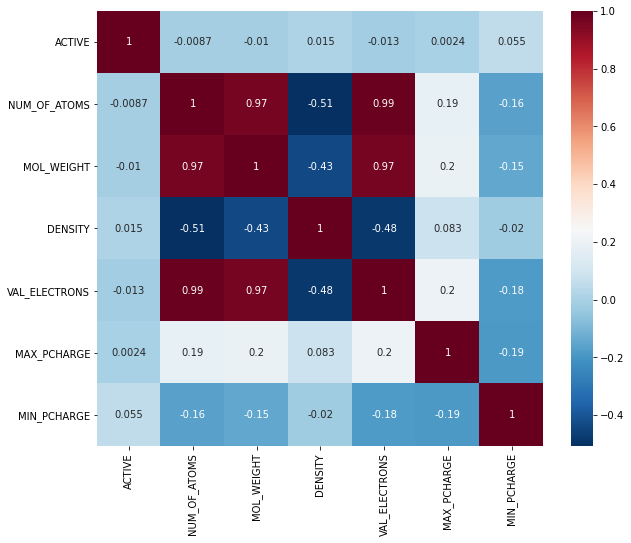

In [397]:
# Heatmap of correlations

plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

In [390]:
 # Binary features
    
    # Morgan Fingerprint

    morganFingerprintDf = pd.DataFrame(columns=np.arange(124)).add_prefix("MFP_v")


    
    for row in dfCopy.iterrows():
        MF = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(row[1][1]),2,nBits=124)
        MF = np.array(MF)
        morganFingerprintDf.loc[row[1][0]-1] = MF
        
    dfCopy = pd.concat([dfCopy, morganFingerprintDf], axis=1)
    
# FR_CA_
    dfCopy["FR_CAL_COO"] = dfCopy.apply(lambda x: (f.fr_Al_COO(Chem.MolFromSmiles(x["SMILES"]))), axis=1) #Chem.MolFromSmiles(x["SMILES"]).GetNumAtoms(), axis=0)



IndentationError: unexpected indent (<ipython-input-390-7f6695abb2b5>, line 5)